In [7]:
from base_dd import BDD_EVENTS
import numpy as np
import pandas as pd
from scipy.linalg import eigh
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def norm(x):
    return np.max(np.abs(x))

def gradient_logistic_regression(X, y, w):
    return (np.array((sigmoid(X @ w) - y)).reshape(-1, 1) * X).mean(axis=0)

def lr_opti(X):
    lr = (4 * X.shape[0]) / eigh(
        X.T @ X,
        eigvals_only=True,
        subset_by_index=[X.shape[1] - 1, X.shape[1] - 1]
    ).item()
    return lr


def gradient_descent(X, y, max_iter, tol, lr):
    w = np.zeros(X.shape[1])
    grad = gradient_logistic_regression(X, y, w)
    if norm(grad) < tol:
        return {'coef': w, 'convergé': True, 'n_iter': 0}
    converge = False
    for n_iter in range(1, max_iter + 1):
        w -= lr * grad
        grad = gradient_logistic_regression(X, y, w)
        if norm(grad) < tol:
            converge = True
            break
    return {'coef': w, 'convergé': converge, 'n_iter': n_iter, 'gradient': grad}

def prediction(x, w):
    return x@w > 0

In [17]:
#Nettoyage et Encodage

variable = ['Height', 'Age', 'Sex', 'Weight', 'NOC']
variable_quali = ['Sex', 'NOC']

df = BDD_EVENTS.loc[BDD_EVENTS['Sport'] == 'Basketball', variable + ['Medal']]
df.loc[df['Medal'].isna(), 'Medal'] = 0
df.loc[df['Medal']!=0, 'Medal'] = 1
df = df.dropna(axis=0, how='any')
X = df[variable]
Y = df['Medal']
Y = np.round(Y).astype(int)
X_E = pd.get_dummies(X, columns=variable_quali, drop_first=False, dtype=int)
X_log = np.hstack((X_E, np.ones((X_E.shape[0], 1))))

YG = Y[df['Medal']==1]
X_EG = X_E[df['Medal']==1]
X_logG = X_log[df['Medal']==1]
X_log.shape, X_logG.shape

((3668, 63), (1000, 63))

In [23]:
#Learn

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='newton-cg', class_weight='balanced')
model.fit(X_E, Y)
print(model.coef_)
print(model.score(X_E, Y))
print(model.score(X_EG, YG))


[[ 3.12438154e-04 -2.48682317e-02  4.08428788e-03  5.64105996e-01
  -5.71411026e-01 -1.64517403e+00  2.40027742e+00  1.18673712e+00
  -1.37596534e+00  1.20360334e+00  1.47819257e+00 -5.95180663e-01
  -1.92444674e+00 -1.54933996e-01  1.80428623e-01 -9.93948341e-01
   1.30053484e+00  4.58448421e-01 -1.73029490e+00 -1.22062602e+00
   2.00842429e+00 -1.56726434e-01  1.65748718e+00 -7.19142205e-01
   1.56344035e+00 -9.12659255e-01 -1.22065642e+00 -8.94597771e-01
  -1.48291081e+00 -1.59543801e+00 -5.57876696e-01 -6.08182764e-01
   1.15900792e+00 -2.13613215e+00 -7.25821460e-02 -1.05799652e+00
   2.50126277e+00 -4.05548076e-01 -1.24687045e+00 -1.67038086e-01
  -1.32691112e+00 -1.85006118e+00 -5.91352409e-01 -6.21416587e-01
  -1.09516536e+00 -1.69149281e+00 -1.76307919e+00  1.74943007e+00
   1.99759965e+00 -1.65061776e+00  3.86400603e+00 -1.05334674e+00
  -6.16110034e-01 -1.99882587e+00 -5.90169109e-01 -1.38938570e+00
  -9.56891147e-01  5.44025713e+00  1.28704669e+00  6.25826060e+00
  -7.32048

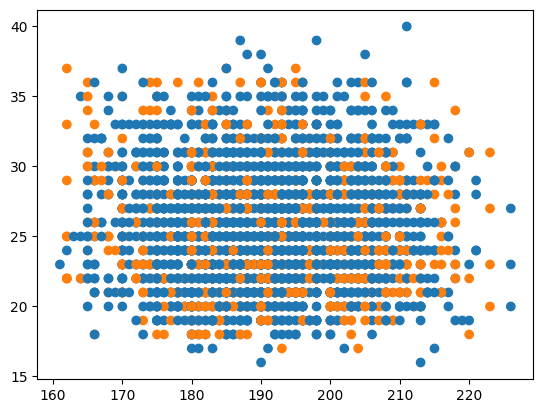

In [22]:
plt.scatter(X_log[:, 0], X_log[:, 1], c=np.array(['C0', 'C1'])[Y])
plt.show()